## Task 1

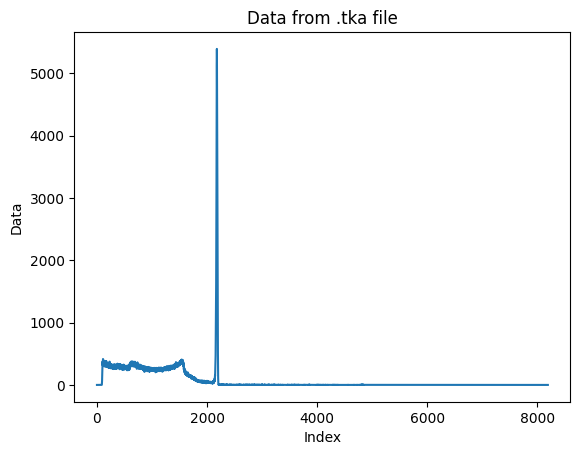

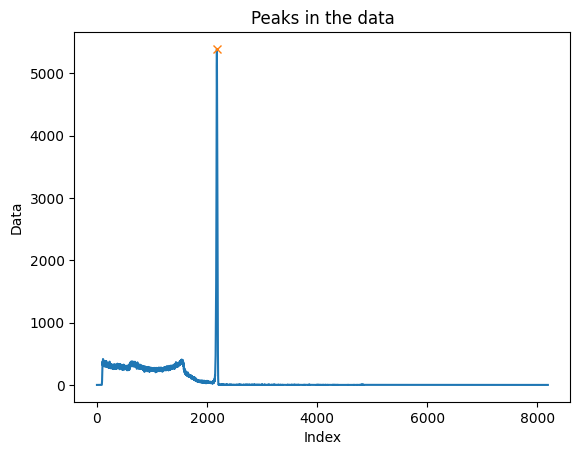

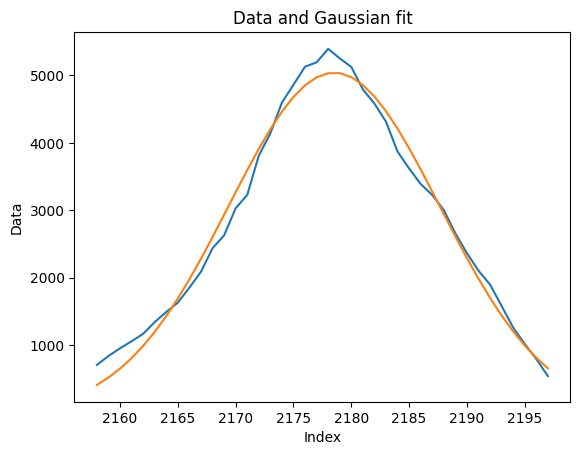

Amplitude: 5041.121480647572
Mean: 2178.51440190651
Standard deviation: 9.142215766558298
R^2: 0.9841028559614153
FWHM: 21.528272943089465


In [21]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks


# load data from .tka file. it is only 1 row, which should be on the y axis,the x axis is just the index of the row

# Load the data
data = np.loadtxt('Task 1/1.TKA', skiprows=2)

# Create an array for indices
indices = np.arange(len(data))

# Plot the data
plt.plot(indices, data)
plt.xlabel('Index')
plt.ylabel('Data')
plt.title('Data from .tka file')
plt.show()

# find the peaks

peaks, _ = find_peaks(data, height=2000)
plt.plot(indices, data)
plt.plot(peaks, data[peaks], "x")
plt.xlabel('Index')
plt.ylabel('Data')
plt.title('Peaks in the data')
plt.show()


# Define the gaussian function
def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))

# there is only one peak, so draw a window around it and fit a gaussian to it

# Define the window
window = 20

# Define the window around the peak
window_data = data[peaks[0] - window:peaks[0] + window]
window_indices = indices[peaks[0] - window:peaks[0] + window]

# Fit the gaussian
popt, _ = curve_fit(gaussian, window_indices, window_data, p0=[2000, peaks[0], 10])

# Plot the data and the gaussian
plt.plot(window_indices, window_data)
plt.plot(window_indices, gaussian(window_indices, *popt))
plt.xlabel('Index')
plt.ylabel('Data')
plt.title('Data and Gaussian fit')
plt.show()

# Print the parameters of the gaussian and R^2
print('Amplitude:', popt[0])
print('Mean:', popt[1])
print('Standard deviation:', popt[2])
print('R^2:', np.corrcoef(window_data, gaussian(window_indices, *popt))[0, 1] ** 2)

# find the FWHM
FWHM = 2 * np.sqrt(2 * np.log(2)) * popt[2]
print('FWHM:', FWHM)







stdv: 9.142215766558298


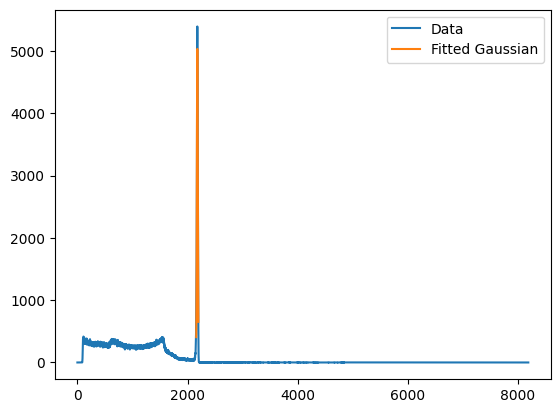

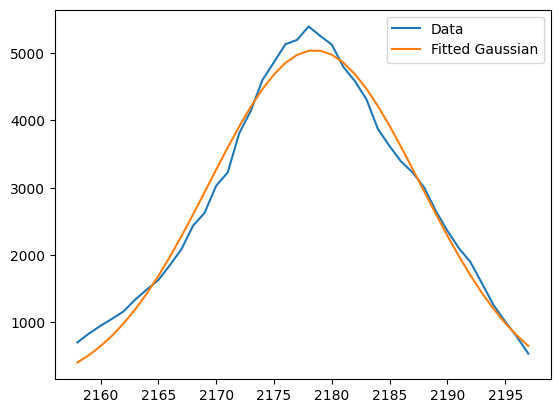

stdv: 6.442688669130202


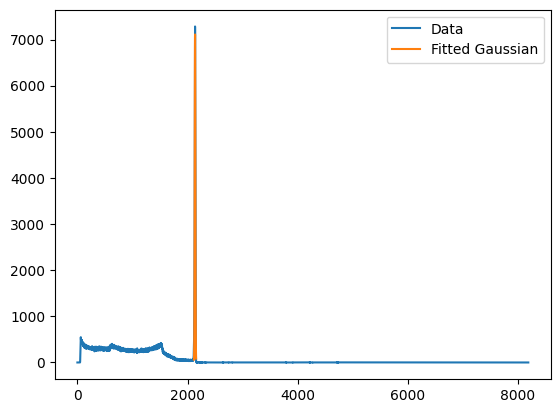

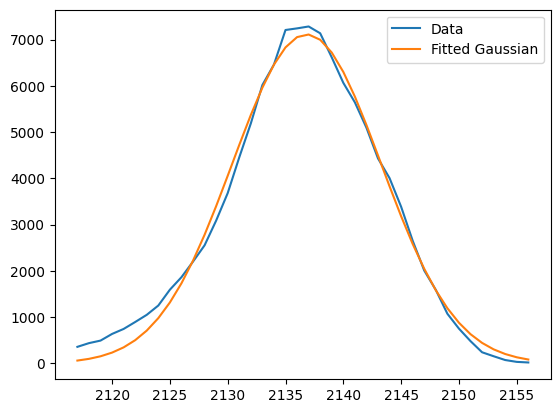

stdv: -4.683474828506527


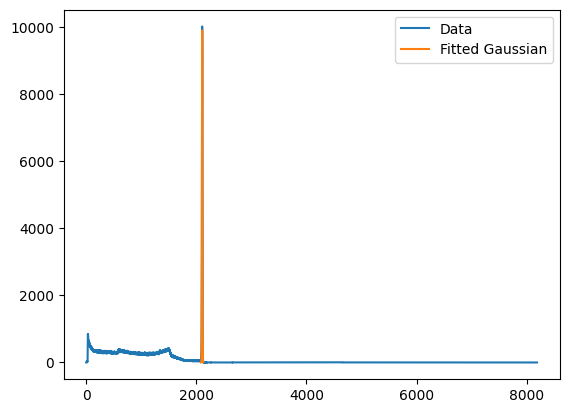

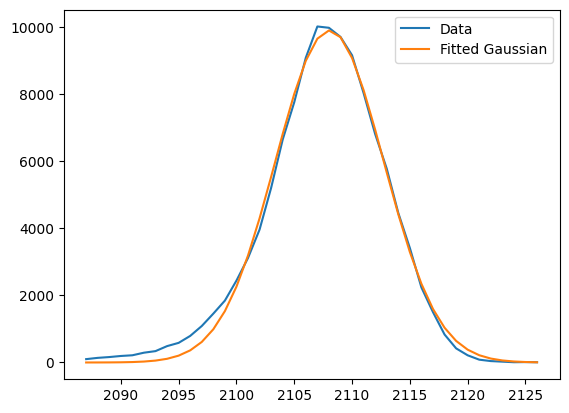

stdv: 2.934873678694544


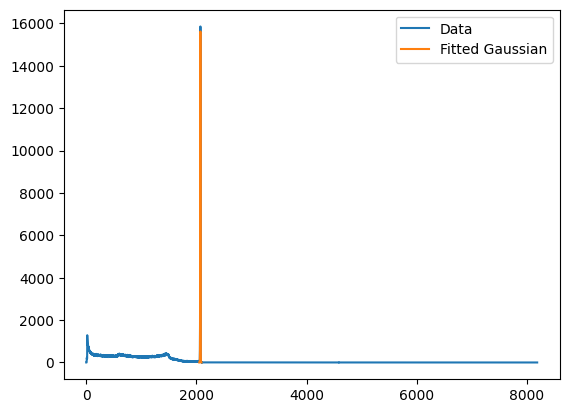

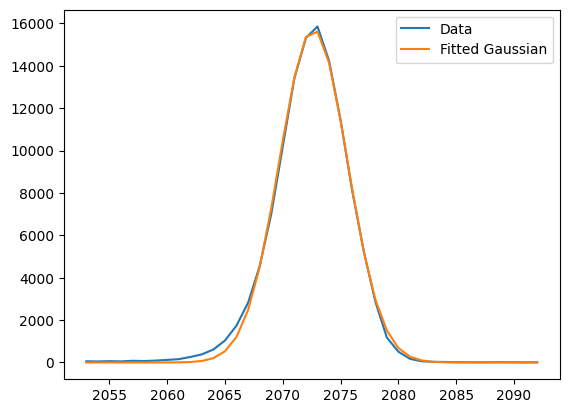

stdv: 2.353977451050651


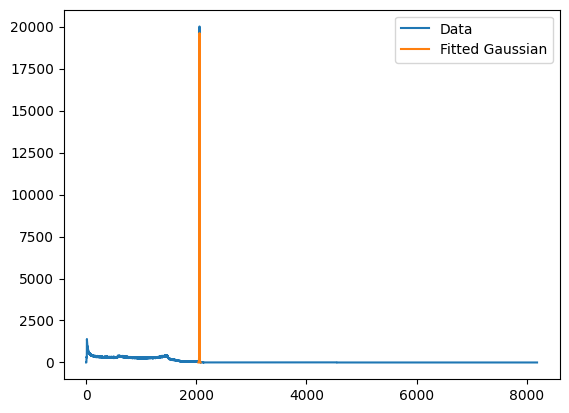

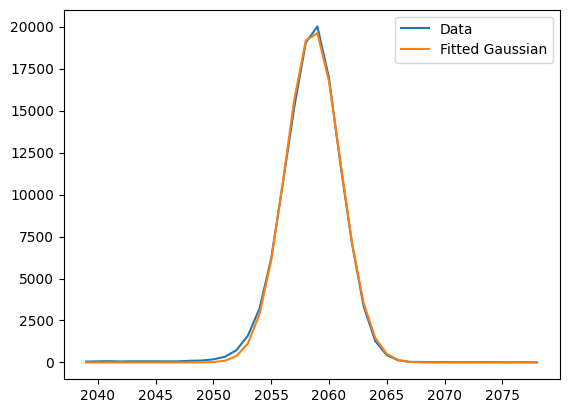

stdv: 2.011387383822805


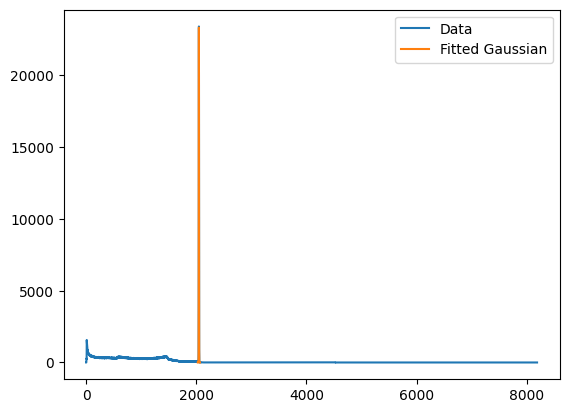

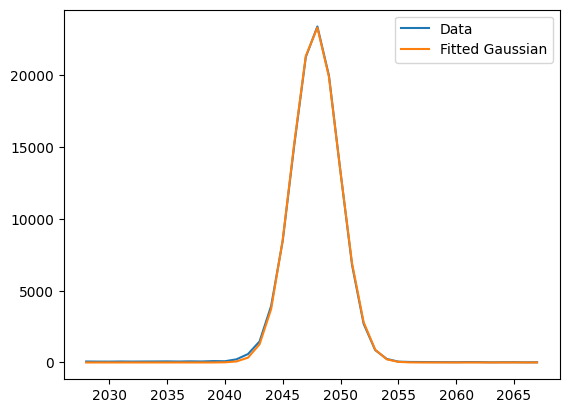

stdv: 1.8561409445744688


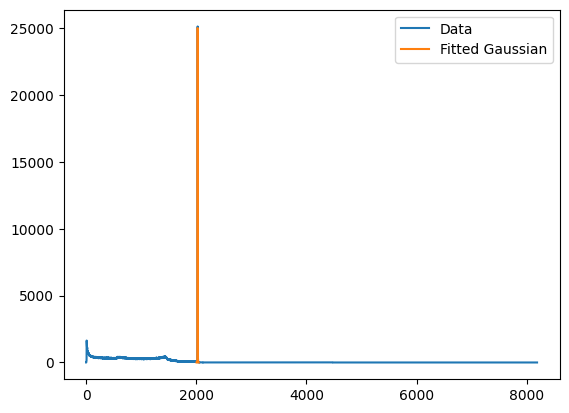

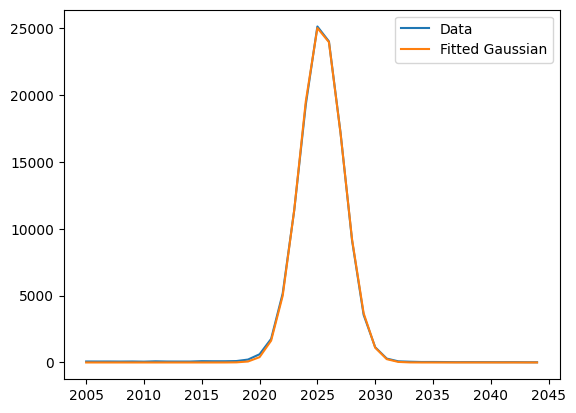

stdv: 1.8307284760839473


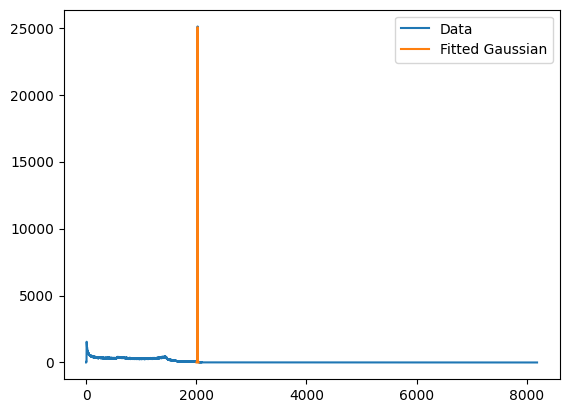

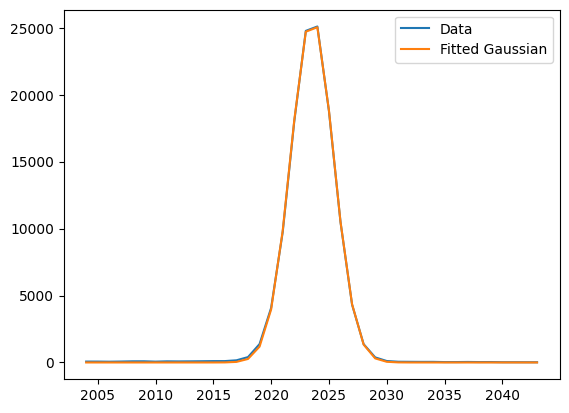

stdv: 1.8488425046350008


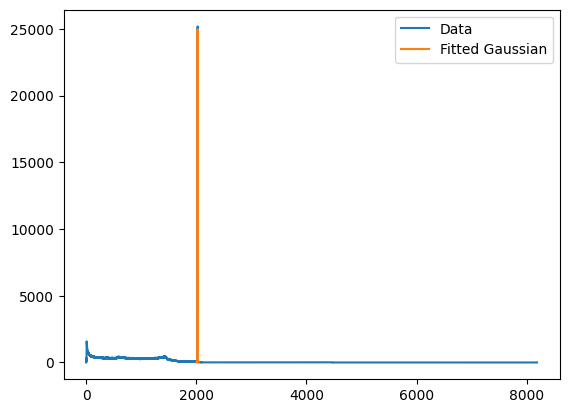

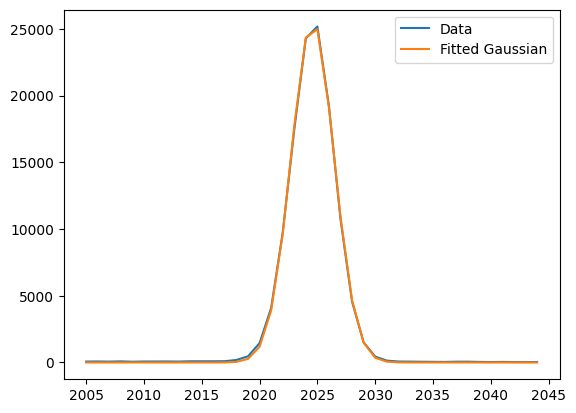

FWHM values: [21.52827294 15.17137242 11.02874041  6.91109937  5.54319329  4.73645533
  4.3708779   4.31103611  4.35369139]


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

# Define the gaussian function
def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))

# Initialize an empty list to store the FWHM values
FWHM_values = []

# Loop over the range from 1 to 9 (inclusive)
for i in range(1, 10):
    # Load the data
    data = np.loadtxt(f'Task 1/{i}.TKA', skiprows=2)

    # Create an array for indices
    indices = np.arange(len(data))

    # Find the peaks
    peaks, _ = find_peaks(data, height=2000)

    # Define the window
    window = 20

    # Define the window around the peak
    window_data = data[peaks[0] - window:peaks[0] + window]
    window_indices = indices[peaks[0] - window:peaks[0] + window]

    # Fit the gaussian
    popt, _ = curve_fit(gaussian, window_indices, window_data, p0=[2000, peaks[0], 10])

    # Calculate the FWHM and append it to the list
    print('stdv:', popt[2])
    FWHM = 2 * np.sqrt(2 * np.log(2)) * np.abs(popt[2])
    FWHM_values.append(FWHM)

    # Plot the data and the fitted Gaussian
    plt.figure()
    plt.plot(indices, data, label='Data')
    plt.plot(window_indices, gaussian(window_indices, *popt), label='Fitted Gaussian')
    plt.legend()
    plt.show()

    # Plot the data and the fitted Gaussian
    plt.figure()
    plt.plot(window_indices, window_data, label='Data')
    plt.plot(window_indices, gaussian(window_indices, *popt), label='Fitted Gaussian')
    plt.legend()
    plt.show()

# Convert the list to a numpy array
FWHM_values = np.array(FWHM_values)

print('FWHM values:', FWHM_values)

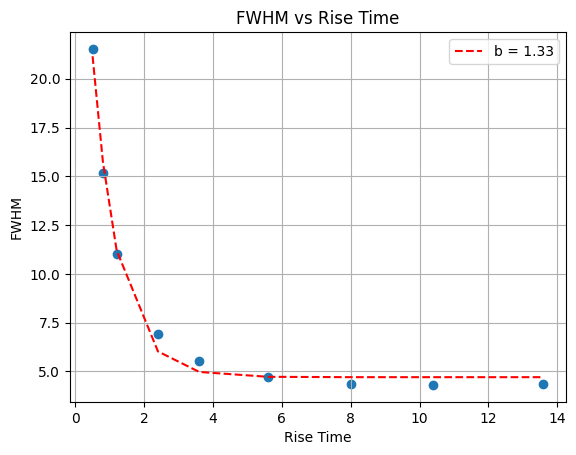

a: 31.94731542409722
b: 1.3280599618106166
c: 4.707828393120085
R^2: 0.9932652001346182


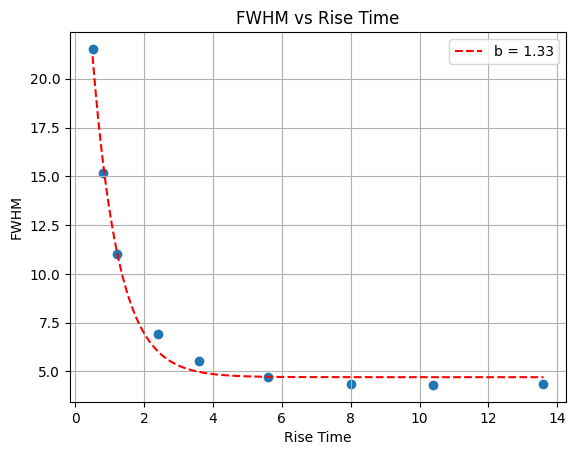

In [52]:
# Define the rise times
rise_times = np.array([0.5, 0.8, 1.2, 2.4, 3.6, 5.6, 8, 10.4, 13.6])

# Define the exponential function
def exponential(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the exponential
popt, _ = curve_fit(exponential, rise_times, FWHM_values, p0=[1, 1, 5])

# Plot the data and the fitted exponential, with the R^2 value and the parameters
plt.figure()
plt.scatter(rise_times, FWHM_values)
plt.plot(rise_times, exponential(rise_times, *popt), label=f'b = {popt[1]:.2f}', color='red', linestyle='--')
plt.xlabel('Rise Time')
plt.ylabel('FWHM')
plt.title('FWHM vs Rise Time')
plt.grid(True)
plt.legend()
plt.show()

# Print the parameters of the exponential and R^2
print('a:', popt[0])
print('b:', popt[1])
print('c:', popt[2])
print('R^2:', np.corrcoef(FWHM_values, exponential(rise_times, *popt))[0, 1] ** 2)

# Generate a new array with more points for a higher resolution fit
rise_times_high_res = np.linspace(rise_times.min(), rise_times.max(), 500)

# Plot the data and the fitted exponential, with the R^2 value and the parameters
plt.figure()
plt.scatter(rise_times, FWHM_values)
plt.plot(rise_times_high_res, exponential(rise_times_high_res, *popt), label=f'b = {popt[1]:.2f}', color='red', linestyle='--')
plt.xlabel('Rise Time')
plt.ylabel('FWHM')
plt.title('FWHM vs Rise Time')
plt.grid(True)
plt.legend()
plt.show()



## Task 2